In [1]:
#pip install imblearn # imbalanced learning y variable(0,1) is not balanced

In [2]:
# This project is about picking "Highly likely customers" to apply for the loans based on the predicted propensity scores 
# Use Logistic Regression & Random Forest as classifiers.


In [3]:
# download all the necessary libraries and functions needed for the proeject. 


import imblearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot
import sys
from IPython.display import display # display the results in HTML
np.set_printoptions(threshold=sys.maxsize)
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, precision_recall_curve, auc, roc_auc_score, roc_curve, recall_score, classification_report
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
import statsmodels.api as sms
import statsmodels.stats.api as sms0
from imblearn.over_sampling import SMOTE

In [4]:
base = '../input/'
file = 'PLXSELL.csv'
df_loan = pd.read_csv(base+file)

In [5]:
# Exploratory analysis

In [6]:
df_loan.head()

,CUST_ID,TARGET,AGE,GENDER,BALANCE,OCCUPATION,AGE_BKT,SCR,HOLDING_PERIOD,ACC_TYPE,...,NO_OF_IW_CHQ_BNC_TXNS,NO_OF_OW_CHQ_BNC_TXNS,AVG_AMT_PER_ATM_TXN,AVG_AMT_PER_CSH_WDL_TXN,AVG_AMT_PER_CHQ_TXN,AVG_AMT_PER_NET_TXN,AVG_AMT_PER_MOB_TXN,FLG_HAS_NOMINEE,FLG_HAS_OLD_LOAN,random
0,C7927,0,27,M,3383.75,SELF_EMP,26-30,776,30,SA,...,0,0,13100.0,0.0,0.0,486778.50,0.0,1,1,0.000011
1,C6877,0,47,M,287489.04,SAL,46-50,324,28,SA,...,0,0,6600.0,0.0,0.0,799813.00,0.0,1,0,0.000111
2,C19922,0,40,M,18216.88,SELF_EMP,36-40,603,2,SA,...,0,1,11200.0,561120.0,24660.0,997570.00,0.0,1,1,0.000120
3,C8183,0,53,M,71720.48,SAL,>50,196,13,CA,...,0,0,13050.0,168397.5,15195.0,247168.67,71388.0,1,0,0.000137
4,C12123,0,36,M,1671622.89,PROF,36-40,167,24,SA,...,0,0,0.0,808480.0,0.0,0.00,0.0,1,0,0.000174


In [7]:
df_loan.columns

Index(['CUST_ID', 'TARGET', 'AGE', 'GENDER', 'BALANCE', 'OCCUPATION',
       'AGE_BKT', 'SCR', 'HOLDING_PERIOD', 'ACC_TYPE', 'ACC_OP_DATE',
       'LEN_OF_RLTN_IN_MNTH', 'NO_OF_L_CR_TXNS', 'NO_OF_L_DR_TXNS',
       'TOT_NO_OF_L_TXNS', 'NO_OF_BR_CSH_WDL_DR_TXNS', 'NO_OF_ATM_DR_TXNS',
       'NO_OF_NET_DR_TXNS', 'NO_OF_MOB_DR_TXNS', 'NO_OF_CHQ_DR_TXNS',
       'FLG_HAS_CC', 'AMT_ATM_DR', 'AMT_BR_CSH_WDL_DR', 'AMT_CHQ_DR',
       'AMT_NET_DR', 'AMT_MOB_DR', 'AMT_L_DR', 'FLG_HAS_ANY_CHGS',
       'AMT_OTH_BK_ATM_USG_CHGS', 'AMT_MIN_BAL_NMC_CHGS',
       'NO_OF_IW_CHQ_BNC_TXNS', 'NO_OF_OW_CHQ_BNC_TXNS', 'AVG_AMT_PER_ATM_TXN',
       'AVG_AMT_PER_CSH_WDL_TXN', 'AVG_AMT_PER_CHQ_TXN', 'AVG_AMT_PER_NET_TXN',
       'AVG_AMT_PER_MOB_TXN', 'FLG_HAS_NOMINEE', 'FLG_HAS_OLD_LOAN', 'random'],
      dtype='object')

In [8]:
# Eliminating CUST_ID and 'random' variables as they are not used for training
df_loan.drop(columns=['CUST_ID', 'random'],inplace=True)

In [9]:
df_loan.columns

Index(['TARGET', 'AGE', 'GENDER', 'BALANCE', 'OCCUPATION', 'AGE_BKT', 'SCR',
       'HOLDING_PERIOD', 'ACC_TYPE', 'ACC_OP_DATE', 'LEN_OF_RLTN_IN_MNTH',
       'NO_OF_L_CR_TXNS', 'NO_OF_L_DR_TXNS', 'TOT_NO_OF_L_TXNS',
       'NO_OF_BR_CSH_WDL_DR_TXNS', 'NO_OF_ATM_DR_TXNS', 'NO_OF_NET_DR_TXNS',
       'NO_OF_MOB_DR_TXNS', 'NO_OF_CHQ_DR_TXNS', 'FLG_HAS_CC', 'AMT_ATM_DR',
       'AMT_BR_CSH_WDL_DR', 'AMT_CHQ_DR', 'AMT_NET_DR', 'AMT_MOB_DR',
       'AMT_L_DR', 'FLG_HAS_ANY_CHGS', 'AMT_OTH_BK_ATM_USG_CHGS',
       'AMT_MIN_BAL_NMC_CHGS', 'NO_OF_IW_CHQ_BNC_TXNS',
       'NO_OF_OW_CHQ_BNC_TXNS', 'AVG_AMT_PER_ATM_TXN',
       'AVG_AMT_PER_CSH_WDL_TXN', 'AVG_AMT_PER_CHQ_TXN', 'AVG_AMT_PER_NET_TXN',
       'AVG_AMT_PER_MOB_TXN', 'FLG_HAS_NOMINEE', 'FLG_HAS_OLD_LOAN'],
      dtype='object')

In [10]:
# Eliminating AGE_BKT and ACC_OP_DATE as they are generated by other variables within the dataset.   
df_loan.drop(columns=['AGE_BKT', 'ACC_OP_DATE'], inplace=True)

In [11]:
df_loan.dtypes
# GENDER, OCCUPATION, ACC_TYPE 

TARGET                        int64
AGE                           int64
GENDER                       object
BALANCE                     float64
OCCUPATION                   object
SCR                           int64
HOLDING_PERIOD                int64
ACC_TYPE                     object
LEN_OF_RLTN_IN_MNTH           int64
NO_OF_L_CR_TXNS               int64
NO_OF_L_DR_TXNS               int64
TOT_NO_OF_L_TXNS              int64
NO_OF_BR_CSH_WDL_DR_TXNS      int64
NO_OF_ATM_DR_TXNS             int64
NO_OF_NET_DR_TXNS             int64
NO_OF_MOB_DR_TXNS             int64
NO_OF_CHQ_DR_TXNS             int64
FLG_HAS_CC                    int64
AMT_ATM_DR                    int64
AMT_BR_CSH_WDL_DR             int64
AMT_CHQ_DR                    int64
AMT_NET_DR                  float64
AMT_MOB_DR                    int64
AMT_L_DR                    float64
FLG_HAS_ANY_CHGS              int64
AMT_OTH_BK_ATM_USG_CHGS       int64
AMT_MIN_BAL_NMC_CHGS          int64
NO_OF_IW_CHQ_BNC_TXNS       

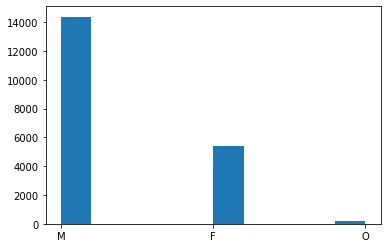

In [12]:
df_loan['GENDER'].unique() 
plt.hist(df_loan.GENDER, bins=10)
plt.show()

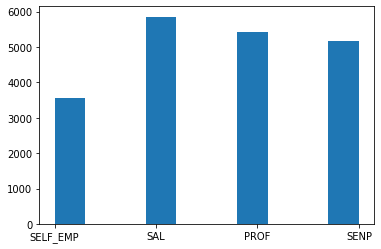

In [13]:
df_loan['OCCUPATION'].unique()  
plt.hist(df_loan.OCCUPATION, bins=10)
plt.show()

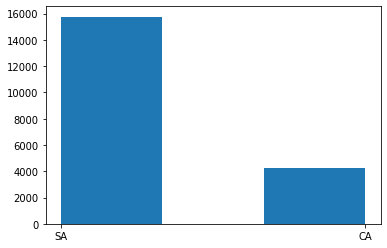

In [14]:
df_loan['ACC_TYPE'].unique() 
plt.hist(df_loan.ACC_TYPE, bins=3)
plt.show()

In [15]:
# Converting string data into integer values by creating dummy variables.

df_loan_gender = pd.get_dummies(df_loan['GENDER'].values,drop_first=True)
df_loan_occupation = pd.get_dummies(df_loan['OCCUPATION'].values,drop_first=True)
df_loan_acc_type =pd.get_dummies(df_loan['ACC_TYPE'].values,drop_first=True)

In [16]:
# Remove the original string data
df_loan_reduced = df_loan.drop(columns=['GENDER','OCCUPATION','ACC_TYPE'])

In [17]:
df_loan_reduced.head(5)

,TARGET,AGE,BALANCE,SCR,HOLDING_PERIOD,LEN_OF_RLTN_IN_MNTH,NO_OF_L_CR_TXNS,NO_OF_L_DR_TXNS,TOT_NO_OF_L_TXNS,NO_OF_BR_CSH_WDL_DR_TXNS,...,AMT_MIN_BAL_NMC_CHGS,NO_OF_IW_CHQ_BNC_TXNS,NO_OF_OW_CHQ_BNC_TXNS,AVG_AMT_PER_ATM_TXN,AVG_AMT_PER_CSH_WDL_TXN,AVG_AMT_PER_CHQ_TXN,AVG_AMT_PER_NET_TXN,AVG_AMT_PER_MOB_TXN,FLG_HAS_NOMINEE,FLG_HAS_OLD_LOAN
0,0,27,3383.75,776,30,146,7,3,10,0,...,0,0,0,13100.0,0.0,0.0,486778.50,0.0,1,1
1,0,47,287489.04,324,28,104,8,2,10,0,...,0,0,0,6600.0,0.0,0.0,799813.00,0.0,1,0
2,0,40,18216.88,603,2,61,10,5,15,1,...,0,0,1,11200.0,561120.0,24660.0,997570.00,0.0,1,1
3,0,53,71720.48,196,13,107,36,14,50,4,...,0,0,0,13050.0,168397.5,15195.0,247168.67,71388.0,1,0
4,0,36,1671622.89,167,24,185,20,1,21,1,...,0,0,0,0.0,808480.0,0.0,0.00,0.0,1,0


In [18]:
df_loan_gender.columns

Index(['M', 'O'], dtype='object')

In [19]:

data_loan = np.hstack((df_loan_reduced.values,df_loan_gender.values,df_loan_occupation.values,df_loan_acc_type.values))
col_loan = np.concatenate([df_loan_reduced.columns,df_loan_gender.columns, df_loan_occupation.columns,df_loan_acc_type.columns])
df_loan = pd.DataFrame(data = data_loan,columns=col_loan)

In [20]:
df_loan.head(5)

,TARGET,AGE,BALANCE,SCR,HOLDING_PERIOD,LEN_OF_RLTN_IN_MNTH,NO_OF_L_CR_TXNS,NO_OF_L_DR_TXNS,TOT_NO_OF_L_TXNS,NO_OF_BR_CSH_WDL_DR_TXNS,...,AVG_AMT_PER_NET_TXN,AVG_AMT_PER_MOB_TXN,FLG_HAS_NOMINEE,FLG_HAS_OLD_LOAN,M,O,SAL,SELF_EMP,SENP,SA
0,0.0,27.0,3383.75,776.0,30.0,146.0,7.0,3.0,10.0,0.0,...,486778.50,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0
1,0.0,47.0,287489.04,324.0,28.0,104.0,8.0,2.0,10.0,0.0,...,799813.00,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
2,0.0,40.0,18216.88,603.0,2.0,61.0,10.0,5.0,15.0,1.0,...,997570.00,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0
3,0.0,53.0,71720.48,196.0,13.0,107.0,36.0,14.0,50.0,4.0,...,247168.67,71388.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,0.0,36.0,1671622.89,167.0,24.0,185.0,20.0,1.0,21.0,1.0,...,0.00,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [21]:
#selecting input variables

df_loan.columns[1:]

Index(['AGE', 'BALANCE', 'SCR', 'HOLDING_PERIOD', 'LEN_OF_RLTN_IN_MNTH',
       'NO_OF_L_CR_TXNS', 'NO_OF_L_DR_TXNS', 'TOT_NO_OF_L_TXNS',
       'NO_OF_BR_CSH_WDL_DR_TXNS', 'NO_OF_ATM_DR_TXNS', 'NO_OF_NET_DR_TXNS',
       'NO_OF_MOB_DR_TXNS', 'NO_OF_CHQ_DR_TXNS', 'FLG_HAS_CC', 'AMT_ATM_DR',
       'AMT_BR_CSH_WDL_DR', 'AMT_CHQ_DR', 'AMT_NET_DR', 'AMT_MOB_DR',
       'AMT_L_DR', 'FLG_HAS_ANY_CHGS', 'AMT_OTH_BK_ATM_USG_CHGS',
       'AMT_MIN_BAL_NMC_CHGS', 'NO_OF_IW_CHQ_BNC_TXNS',
       'NO_OF_OW_CHQ_BNC_TXNS', 'AVG_AMT_PER_ATM_TXN',
       'AVG_AMT_PER_CSH_WDL_TXN', 'AVG_AMT_PER_CHQ_TXN', 'AVG_AMT_PER_NET_TXN',
       'AVG_AMT_PER_MOB_TXN', 'FLG_HAS_NOMINEE', 'FLG_HAS_OLD_LOAN', 'M', 'O',
       'SAL', 'SELF_EMP', 'SENP', 'SA'],
      dtype='object')

In [22]:
# checking if there are any missing variables for each column
df_loan.isnull().sum()

TARGET                      0
AGE                         0
BALANCE                     0
SCR                         0
HOLDING_PERIOD              0
LEN_OF_RLTN_IN_MNTH         0
NO_OF_L_CR_TXNS             0
NO_OF_L_DR_TXNS             0
TOT_NO_OF_L_TXNS            0
NO_OF_BR_CSH_WDL_DR_TXNS    0
NO_OF_ATM_DR_TXNS           0
NO_OF_NET_DR_TXNS           0
NO_OF_MOB_DR_TXNS           0
NO_OF_CHQ_DR_TXNS           0
FLG_HAS_CC                  0
AMT_ATM_DR                  0
AMT_BR_CSH_WDL_DR           0
AMT_CHQ_DR                  0
AMT_NET_DR                  0
AMT_MOB_DR                  0
AMT_L_DR                    0
FLG_HAS_ANY_CHGS            0
AMT_OTH_BK_ATM_USG_CHGS     0
AMT_MIN_BAL_NMC_CHGS        0
NO_OF_IW_CHQ_BNC_TXNS       0
NO_OF_OW_CHQ_BNC_TXNS       0
AVG_AMT_PER_ATM_TXN         0
AVG_AMT_PER_CSH_WDL_TXN     0
AVG_AMT_PER_CHQ_TXN         0
AVG_AMT_PER_NET_TXN         0
AVG_AMT_PER_MOB_TXN         0
FLG_HAS_NOMINEE             0
FLG_HAS_OLD_LOAN            0
M         

In [23]:
# Check the proportion of people who are interested in borrowing loans 
df_loan['TARGET'].mean()  # imbalanced 

0.1256

In [24]:
yX = df_loan.values

In [25]:
y = yX[:,0]

In [26]:
X = yX[:,1:]

In [27]:
print(yX.shape)
print(y.shape)
print(X.shape)

(20000, 39)
(20000,)
(20000, 38)


In [28]:
#Split the sample into training and testing ones (70:30)

X_train0, X_test, y_train0, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [29]:
y_train0.mean()

0.12728571428571428

In [30]:
y_train0.shape

(14000,)

In [31]:
# For our imbalanced data, use SMOTE (Synthetic Minority Oversampling Technique)
sm = SMOTE(random_state=2)
X_train, y_train = sm.fit_sample(X_train0, y_train0.ravel())


df_X_train = pd.DataFrame(data=X_train, columns=df_loan.columns[1:])
df_y_train =  pd.DataFrame(data=y_train, columns=['TARGET'])

In [32]:
y_train.mean()

0.5

In [33]:
y_train.shape

(24436,)

In [34]:
# Feature Selection: pick relevant input variables 
alphaset = [0.01] # prespecified significance level
for alpha in alphaset:
    chi2_stat, pval = chi2(X_train,y_train)
    stat_significance_mask = (pval<alpha)
    n_features = stat_significance_mask.sum()
    print('Alpha and # of Features;', alpha, n_features)
    df_significance = pd.DataFrame(data=(pval<alpha).reshape(1,-1), columns=df_X_train.columns)
    df_sig_selected = []
    print('-----False columns-----')
    for i in range(stat_significance_mask.shape[0]):
        if (pval<alpha)[i] == False:
            print(df_significance.columns[i])
    print('-----True columns-----')
    for i in range(stat_significance_mask.shape[0]):
        if (pval<alpha)[i] == True:
            print(df_significance.columns[i])
            df_sig_selected = df_sig_selected + [df_significance.columns[i]]
    k_best = SelectKBest(score_func=chi2, k=n_features).fit(X_train,y_train)
    X_top_k = k_best.transform(X_train)

X_slogit = np.hstack((np.ones((X_top_k.shape[0],1)),X_top_k))
X_srf = X_top_k
y_s = y_train.ravel()

df_X_top_k = pd.DataFrame(data=X_top_k, columns = df_sig_selected)

Alpha and # of Features; 0.01 36
-----False columns-----
NO_OF_IW_CHQ_BNC_TXNS
FLG_HAS_NOMINEE
-----True columns-----
AGE
BALANCE
SCR
HOLDING_PERIOD
LEN_OF_RLTN_IN_MNTH
NO_OF_L_CR_TXNS
NO_OF_L_DR_TXNS
TOT_NO_OF_L_TXNS
NO_OF_BR_CSH_WDL_DR_TXNS
NO_OF_ATM_DR_TXNS
NO_OF_NET_DR_TXNS
NO_OF_MOB_DR_TXNS
NO_OF_CHQ_DR_TXNS
FLG_HAS_CC
AMT_ATM_DR
AMT_BR_CSH_WDL_DR
AMT_CHQ_DR
AMT_NET_DR
AMT_MOB_DR
AMT_L_DR
FLG_HAS_ANY_CHGS
AMT_OTH_BK_ATM_USG_CHGS
AMT_MIN_BAL_NMC_CHGS
NO_OF_OW_CHQ_BNC_TXNS
AVG_AMT_PER_ATM_TXN
AVG_AMT_PER_CSH_WDL_TXN
AVG_AMT_PER_CHQ_TXN
AVG_AMT_PER_NET_TXN
AVG_AMT_PER_MOB_TXN
FLG_HAS_OLD_LOAN
M
O
SAL
SELF_EMP
SENP
SA


score:  1.0


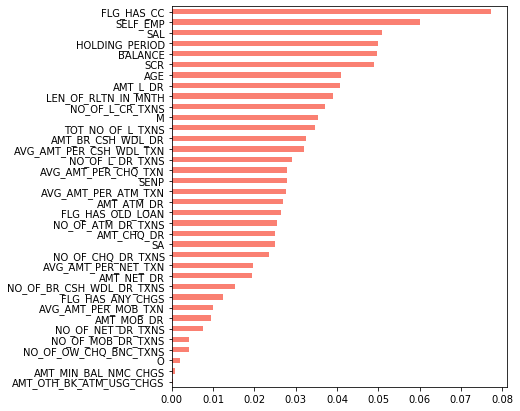

In [35]:
# Building Random Forest
# feature importance analysis


rfr = RandomForestClassifier (random_state=0)
rfr.fit(X_srf,y_s)
print("score: ",rfr.score(X_srf,y_s))

feature_imp_a = np.round(np.array(rfr.feature_importances_),4)
ser_a = pd.Series(feature_imp_a, index=df_sig_selected, name="Feature_Importance").sort_values(ascending=True)
plt.figure(figsize=(6,7))
ser_a.plot(kind="barh",color="salmon")
plt.show()

Feature: constant, Score: 0.0
Feature: AGE, Score: 0.1292089459496474
Feature: BALANCE, Score: -1.4928492464730425
Feature: SCR, Score: 0.8333014759278888
Feature: HOLDING_PERIOD, Score: -1.6152184029079573
Feature: LEN_OF_RLTN_IN_MNTH, Score: -0.40150647077294305
Feature: NO_OF_L_CR_TXNS, Score: 2.1974466881420547
Feature: NO_OF_L_DR_TXNS, Score: 0.3883416754926641
Feature: TOT_NO_OF_L_TXNS, Score: -0.4679524841833176
Feature: NO_OF_BR_CSH_WDL_DR_TXNS, Score: 0.29480125978473165
Feature: NO_OF_ATM_DR_TXNS, Score: 1.326526670076877
Feature: NO_OF_NET_DR_TXNS, Score: -0.29126796370211544
Feature: NO_OF_MOB_DR_TXNS, Score: 0.023922930732868098
Feature: NO_OF_CHQ_DR_TXNS, Score: -0.20253864860576035
Feature: FLG_HAS_CC, Score: 0.7931156187415539
Feature: AMT_ATM_DR, Score: -1.3313609460437945
Feature: AMT_BR_CSH_WDL_DR, Score: 0.10523388232198953
Feature: AMT_CHQ_DR, Score: 0.7291511603282231
Feature: AMT_NET_DR, Score: -0.44803940279952437
Feature: AMT_MOB_DR, Score: -0.17533974107055603

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


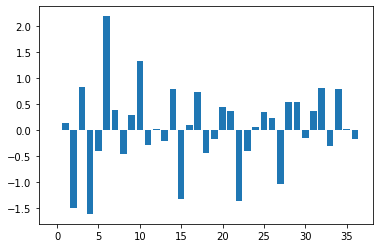

In [36]:
# Building logistic regression: rescaling and feature importance analysis
min_max_scaler = preprocessing.MinMaxScaler()
X_slogit0 = min_max_scaler.fit_transform(X_slogit)

clf = LogisticRegression()
clf.fit(X_slogit0,y_s)

importance = clf.coef_[0]
df_sig_selected.insert(0,'constant')
# summarizeing feature importance
for i,v in zip(df_sig_selected, importance.tolist()):
    print('Feature: {}, Score: {}'.format(i,v))
    
pyplot.bar([x for x in range(len(importance))],importance)
pyplot.show()

In [37]:
set_train = np.hstack((y_train.reshape(-1,1),X_train))
set_test = np.hstack((y_test.reshape(-1,1),X_test))
df_test = pd.DataFrame(data=set_test, columns = np.hstack((['response'],df_loan.columns[1:]))) 
df_train = pd.DataFrame(data=set_train, columns = np.hstack((['response'],df_loan.columns[1:])))

In [38]:
df_sig_selected.remove('constant')

In [39]:
X_test_top_k = df_test[df_sig_selected]
X_test_top_k0 = min_max_scaler.fit_transform(X_test_top_k)
X_test_logit0 = np.hstack((np.ones((X_test_top_k.shape[0],1)),X_test_top_k0))

In [40]:
# Predict propensity scores and pick highly likey group based on the predicted propensity scores 
# For logistic regression: clf and X_test_logit0. For random forest: rfr and X_test_top_k

from scipy.stats import chi2_contingency
np.random.seed(1)
random_group_size= 500
random_index = list(np.random.choice(range(df_test.shape[0]),size=random_group_size,replace=False))
rest_index = list(set(list(range(df_test.shape[0])))-set(random_index))
df_test_rand = df_test.iloc[random_index]
df_test_rest = df_test.iloc[rest_index]

propensity = rfr.predict_proba(X_test_top_k)[:,1] # logistic: clf and X_test_logit0, random forest: rfr and X_test_top_k
test_prop = np.hstack((df_test['response'].values.reshape(-1,1),propensity.reshape(-1,1)))
df_test_prop = pd.DataFrame(data=test_prop, columns=['y','prop'])
print ('******************************************')
print('*** Based on Calibrated Propensity ***')
print ('******************************************')

df_test_rest0 = df_test_prop.iloc[rest_index]
df_test_rest0_sorted = df_test_rest0.sort_values(by=['prop'],ascending=False)
df_test_hl0 = df_test_rest0_sorted.iloc[range(500)]
print('highly likely group sample size',df_test_hl0.shape[0])
print('highly likely group respondents #',df_test_hl0['y'].sum())
print('highly likely group non-respondents #',df_test_hl0.shape[0]-df_test_hl0['y'].sum())
print('highly likely group response rate',df_test_hl0['y'].sum()/df_test_hl0.shape[0])
print('p', chi2_contingency([[df_test_rand['response'].sum(),random_group_size-df_test_rand['response'].sum()],[df_test_hl0['y'].sum(),df_test_hl0.shape[0]-df_test_hl0['y'].sum()]])[1])
print ('******************************************')
df_test_rest0 = df_test_prop.iloc[rest_index]
df_test_rest0_sorted = df_test_rest0.sort_values(by=['prop'],ascending=False)
df_test_hl0 = df_test_rest0_sorted.iloc[range(1000)]
print('highly likeli group sample size',df_test_hl0.shape[0])
print('highly likeli group respondents #',df_test_hl0['y'].sum())
print('highly likeli group non-respondents #',df_test_hl0.shape[0]-df_test_hl0['y'].sum())
print('highly likeli group response rate',df_test_hl0['y'].sum()/df_test_hl0.shape[0])
print('p', chi2_contingency([[df_test_rand['response'].sum(),random_group_size-df_test_rand['response'].sum()],[df_test_hl0['y'].sum(),df_test_hl0.shape[0]-df_test_hl0['y'].sum()]])[1])
print ('******************************************')
df_test_rest0 = df_test_prop.iloc[rest_index]
df_test_rest0_sorted = df_test_rest0.sort_values(by=['prop'],ascending=False)
df_test_hl0 = df_test_rest0_sorted.iloc[range(1500)]
print('highly likeli group sample size',df_test_hl0.shape[0])
print('highly likeli group respondents #',df_test_hl0['y'].sum())
print('highly likeli group non-respondents #',df_test_hl0.shape[0]-df_test_hl0['y'].sum())
print('highly likeli group response rate',df_test_hl0['y'].sum()/df_test_hl0.shape[0])
print('p', chi2_contingency([[df_test_rand['response'].sum(),random_group_size-df_test_rand['response'].sum()],[df_test_hl0['y'].sum(),df_test_hl0.shape[0]-df_test_hl0['y'].sum()]])[1])
print ('******************************************')
df_test_rest0 = df_test_prop.iloc[rest_index]
df_test_rest0_sorted = df_test_rest0.sort_values(by=['prop'],ascending=False)
df_test_hl0 = df_test_rest0_sorted.iloc[range(2000)]
print('highly likeli group sample size',df_test_hl0.shape[0])
print('highly likeli group respondents #',df_test_hl0['y'].sum())
print('highly likeli group non-respondents #',df_test_hl0.shape[0]-df_test_hl0['y'].sum())
print('highly likeli group response rate',df_test_hl0['y'].sum()/df_test_hl0.shape[0])
print('p', chi2_contingency([[df_test_rand['response'].sum(),random_group_size-df_test_rand['response'].sum()],[df_test_hl0['y'].sum(),df_test_hl0.shape[0]-df_test_hl0['y'].sum()]])[1])

******************************************
*** Based on Calibrated Propensity ***
******************************************
highly likely group sample size 500
highly likely group respondents # 486.0
highly likely group non-respondents # 14.0
highly likely group response rate 0.972
p 1.4794811534205965e-162
******************************************
highly likeli group sample size 1000
highly likeli group respondents # 567.0
highly likeli group non-respondents # 433.0
highly likeli group response rate 0.567
p 8.741531173339393e-63
******************************************
highly likeli group sample size 1500
highly likeli group respondents # 618.0
highly likeli group non-respondents # 882.0
highly likeli group response rate 0.412
p 5.7793560449866395e-34
******************************************
highly likeli group sample size 2000
highly likeli group respondents # 644.0
highly likeli group non-respondents # 1356.0
highly likeli group response rate 0.322
p 3.405174451193194e-20


In [41]:
print ('******************************************')
print('*** Based on Calibrated Propensity ***')
print ('******************************************')

df_test_rest0 = df_test_prop.iloc[rest_index]
n_rest = len(rest_index)
print('# of the rest', n_rest)
hlg_thre = np.empty([len(range(99)),5])
for i in range (99):
    n_hlg = int(np.round_(n_rest*(i+1)*0.01))
    df_test_hl0 = df_test_rest0_sorted.iloc[range(n_hlg)]
    hlg_thre[i,0] = int(i+1)
    hlg_thre[i,1] = int(df_test_hl0.shape[0])
    hlg_thre[i,2] = int(df_test_hl0['y'].sum())
    hlg_thre[i,3] = int(df_test_hl0.shape[0]-df_test_hl0['y'].sum())
    hlg_thre[i,4] = round(df_test_hl0['y'].sum()/df_test_hl0.shape[0]*100,2)
df_hlg_thre = pd.DataFrame(data=hlg_thre, columns=['top_perc','hlss','hlr','hlnr','hlrr_percent'])
print(df_hlg_thre)


******************************************
*** Based on Calibrated Propensity ***
******************************************
# of the rest 5500
    top_perc    hlss    hlr    hlnr  hlrr_percent
0        1.0    55.0   55.0     0.0        100.00
1        2.0   110.0  110.0     0.0        100.00
2        3.0   165.0  165.0     0.0        100.00
3        4.0   220.0  220.0     0.0        100.00
4        5.0   275.0  275.0     0.0        100.00
..       ...     ...    ...     ...           ...
94      95.0  5225.0  673.0  4552.0         12.88
95      96.0  5280.0  673.0  4607.0         12.75
96      97.0  5335.0  673.0  4662.0         12.61
97      98.0  5390.0  673.0  4717.0         12.49
98      99.0  5445.0  673.0  4772.0         12.36

[99 rows x 5 columns]


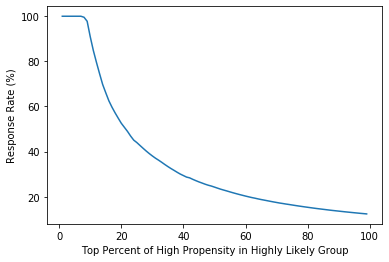

In [42]:
plt.plot(hlg_thre[:,0],hlg_thre[:,4])
plt.ylabel('Response Rate (%)')
plt.xlabel('Top Percent of High Propensity in Highly Likely Group')
plt.show()